# Decoding stimulus identity from neural responses

We implement here a nearest-neighbor decoder of neural activity.

In [4]:
# general modules
import pynwb, os, sys, pprint, itertools
import numpy as np
import matplotlib.pylab as plt

# custom modules
sys.path.append('../physion')
from dataviz.show_data import MultimodalData, EpisodeResponse
from datavyz import graph_env_manuscript as ge
datafolder = os.path.join(os.path.expanduser('~'), 'DATA', 'curated')

In [9]:
filename = '2022_03_16-16-21-18.nwb'
#filename = '2022_03_31-16-12-35.nwb'
#filename = '2022_06_13-14-17-33.nwb'
episodes = EpisodeResponse(os.path.join(datafolder, filename), 
                           quantities=['dFoF', 'pupil'], 
                           protocol_id=0,
                           verbose=True, prestim_duration=1.5)

NWB-file reading time: 189.1ms
  Number of episodes over the whole recording: 40/40 (with protocol condition)
  building episodes with 2 modalities [...]

calculating dF/F with method "maximin" [...]

  ** all ROIs passed the positive F0 criterion ** 

-> dFoF calculus done !  (calculation took 0.1s)
  -> [ok] episodes ready !


In [7]:
print('\n -* Varied Parameters *- \n')
pprint.pprint(episodes.varied_parameters)
VP = [key for key in episodes.varied_parameters if key!='repeat'] # varied parameters except rpeat
print(VP)


 -* Varied Parameters *- 

{'Image-ID': array([3., 4.]),
 'VSE-seed': array([3., 4.]),
 'repeat': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}
['Image-ID', 'VSE-seed']


In [10]:
SUMMARY = {'significant_rois':[[] for i in range(np.product([len(episodes.varied_parameters[key]) for key in VP]))],
           'stim_pair':[[0,0], [0,1], [1,0], [1,1]]}

duration = episodes.data.metadata['presentation-duration']
value_threshold = .6
# looping over neurons
for roi in range(episodes.data.nROIs):
    roi_summary = episodes.compute_summary_data(dict(interval_pre=[-2,0], 
                                                      interval_post=[0,duration],
                                                      test='wilcoxon', 
                                                      positive=True),
                                                 response_args={'quantity':'dFoF', 
                                                                'roiIndex':roi},
                                               response_significance_threshold=0.01)
    for istim in range(len(roi_summary['significant'])):
        if roi_summary['significant'][istim] and (roi_summary['value'][istim]>value_threshold):
            SUMMARY['significant_rois'][istim].append(roi)           
            
#print(SUMMARY['significant_rois'])
#print(roi_summary)

Adapting image to chosen screen resolution [...]
Performing histogram normalization [...]
Adapting image to chosen screen resolution [...]
Performing histogram normalization [...]
Adapting image to chosen screen resolution [...]
Performing histogram normalization [...]
Adapting image to chosen screen resolution [...]
Performing histogram normalization [...]
Adapting image to chosen screen resolution [...]
Performing histogram normalization [...]


NameError: name 'np' is not defined

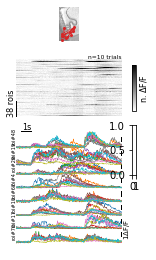

In [11]:
stim_index = 1
SUMMARY['stim_pair']=[[0,0], [0,1], [0,2], [0,3]]
np.random.seed(1)
Nrois = min(len(SUMMARY['significant_rois'][stim_index]), 8)
fig = episodes.plot_evoked_pattern(episodes.find_episode_cond(VP, SUMMARY['stim_pair'][stim_index]),
                                   rois=np.random.choice(SUMMARY['significant_rois'][stim_index], Nrois,replace=False),
                                   quantity='dFoF')
ge.save_on_desktop(fig)

In [ ]:
fig, AX = ge.figure(axes_extents=[[[1,3] for i in range(4)],
                                  [[1,9] for i in range(4)]], 
                     figsize=(1.3, .3), left=0.3,
                     top=12, right=3, wspace=1.2)
 

for stim_index in range(4):
    np.random.seed(6)
    episodes.plot_evoked_pattern(episodes.find_episode_cond(VP, SUMMARY['stim_pair'][stim_index]),
                                   rois=np.random.choice(SUMMARY['significant_rois'][stim_index], 8, replace=True),
                                   quantity='dFoF',
                                 axR=AX[0][stim_index], axT=AX[1][stim_index])
#ge.save_on_desktop(fig, 'fig.png')

In [71]:
# general modules
import pynwb, os, sys, pprint, itertools
import numpy as np
import matplotlib.pylab as plt

# custom modules
sys.path.append('../physion')
from analysis.read_NWB import Data
from dataviz.show_data import MultimodalData, EpisodeResponse
from datavyz import graph_env_manuscript as ge
#filename = '/home/yann.zerlaut/DATA/2022_05_30-16-46-56.nwb'
filename = '/home/yann.zerlaut/DATA/curated/2022_03_31-15-43-55.nwb'
filename = '/home/yann.zerlaut/DATA/curated/2022_03_01-15-25-17.nwb'
data = Data(filename, metadata_only=True)
print(data.protocols)

episodes = EpisodeResponse(filename, quantities=['dFoF', 'Zscore_dFoF'], 
                           verbose=True, prestim_duration=1.5,
                           protocol_id=1)

['spatial-mapping-fast' 'gaussian-blobs']
NWB-file reading time: 156.8ms
  Number of episodes over the whole recording: 120/300 (with protocol condition)
  building episodes with 2 modalities [...]

calculating dF/F with method "maximin" [...]

  ** all ROIs passed the positive F0 criterion ** 

-> dFoF calculus done !  (calculation took 1.1s)
  -> [ok] episodes ready !



 there are several modalities in that episode
     -> need to define the desired quantity, here taking: "dFoF"
X-bar label automatically set to:  1.1  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  0.3  Using the format %.1f  --> adjust it and add units through the format !


{'center-time': array([2., 4., 6.]),
 'radius': array([10., 25.]),
 'repeat': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32)}

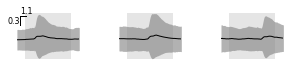

In [72]:
episodes.plot_trial_average(column_key='center-time', roiIndices='all')
episodes.varied_parameters

In [76]:
SUMMARY = {'significant_rois':[[] for i in range(len(episodes.varied_parameters['center-time']))]}

duration = episodes.data.metadata['Protocol-2-presentation-duration']
#duration = episodes.data.metadata['presentation-duration']
    
value_threshold = .6
# looping over neurons
for roi in range(episodes.data.nROIs):
    roi_summary = episodes.compute_summary_data(dict(interval_pre=[-2,0], 
                                                     #interval_post=[0,duration],
                                                     interval_post=[2,3],
                                                      test='wilcoxon', 
                                                      positive=True),
                                                 response_args={'quantity':'dFoF', 
                                                                'roiIndex':roi},
                                               response_significance_threshold=0.01)
    for istim, stim in enumerate(episodes.varied_parameters['center-time']):
        if roi_summary['significant'][istim] and (roi_summary['value'][istim]>value_threshold):
            SUMMARY['significant_rois'][istim].append(roi)
    

[24, 30, 96, 34, 197, 199, 18, 91]


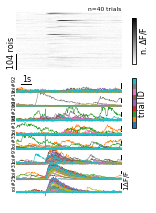

In [96]:
stim_index = 0
np.random.seed(4)
Nrois = min(len(SUMMARY['significant_rois'][stim_index]), 3)

rois = list(np.random.choice(SUMMARY['significant_rois'][stim_index], 3,replace=False))+list(np.random.choice(np.arange(200),5, replace=False))
print(rois)
fig = episodes.plot_evoked_pattern(episodes.find_episode_cond('center-time',stim_index),
                                   rois=rois,
                                   quantity='dFoF', with_stim_inset=False)
ge.save_on_desktop(fig)

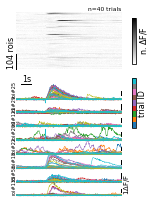

In [97]:
stim_index = 0
rois = [134, 52, 17, 21, 199, 120, 28, 24]
fig = episodes.plot_evoked_pattern(episodes.find_episode_cond('center-time',stim_index),
                                   rois=rois,
                                   quantity='dFoF', with_stim_inset=False)
ge.save_on_desktop(fig)